In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pykrige.ok import OrdinaryKriging
import pykrige.kriging_tools as kt
from pykrige.kriging_tools import write_asc_grid
import gstools as gs
import random

data_file = "../../../data/one_day_data/2020/07/2020-07-27"
df = pd.read_csv(data_file + '/11-40.csv', index_col=0)
df['hour-rain'] = np.where(df['hour-rain'] > 0, df['hour-rain'], round(random.uniform(0.1, 0.8), 5))
print(df['hour-rain'])
bins = gs.standard_bins((df['LAT'], df['LON']), max_dist=np.deg2rad(0.5), latlon=True)
bin_c, vario = gs.vario_estimate((df['LAT'], df['LON']), df['hour-rain'], bins, latlon=True)
model = gs.JBessel(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1)
model.fit_variogram(bin_c, vario, nugget=False, max_eval=100000)
grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
OK_gs = gs.krige.Ordinary(model, [df['LAT'], df['LON']], df['hour-rain'], exact=True)
z1 = OK_gs.structured([grid_lat, grid_lon])
z1 = z1[0]
xintrip, yintrip = np.meshgrid(grid_lon, grid_lat)
rain_data = np.where(z1 > 0, z1, 0)
fig = plt.figure(figsize=(7, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([120.90, 121.150, 14.350, 14.760])
ax.add_feature(cfeature.COASTLINE)

clevs = [0, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

cs = ax.contourf(xintrip, yintrip, rain_data, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation='vertical')
cbar.set_label('millimeter')
ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')
plt.savefig('rain.png')
plt.show()
plt.close()

Vlz-Bagbaguin_00174731     5.50000
NagNayon_00181273          8.50000
Sinegue_00181300           0.50000
DLSAU_00174722            21.50000
ASTI_00173457              6.00000
MM-SanAndres_00173459      3.50000
Vlz-DRRMO_00174734         2.00000
UniManila_00181287         0.67206
TUP-Taguig_00181272       16.50000
MM-Catmon_00174723         0.50000
E-Library_00181274        36.50000
RAVE_00181290             39.00000
Anabu-1B_00181286          3.00000
MM-Tapayan_00173458        6.50000
CMuntilupa_00181294       18.00000
NAMRIA_00181292           26.00000
NBP_00181293              47.50000
PAGASA_00174735            3.50000
LP-Elias_00174724         25.50000
Bayanan-ES_00181283       23.00000
LP-SciHS_00174726          9.00000
CentPark_00181288          2.50000
MM-Libertad_00181289       5.00000
LP-DrFelimon_00174733     14.50000
CAAP_00174729             18.00000
GH-Subdiv_00181291        18.50000
C3Bldg_00181284           13.00000
MM-Balut_00174728          3.50000
Xavier-Sch_00181285 

KeyboardInterrupt: 

NameError: name 'xintrip' is not defined

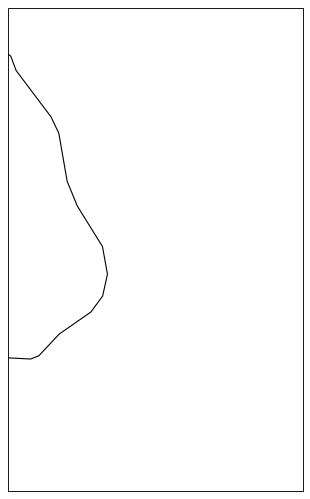

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pykrige.ok import OrdinaryKriging
import pykrige.kriging_tools as kt
from pykrige.kriging_tools import write_asc_grid
from scipy.interpolate import Rbf
import gstools as gs
import random
import requests
import tracemalloc
path = '../../../data/one_day_data/2020/07/2020-07-21/4-50.csv'
df = pd.read_csv(path, index_col=0)
df['hour-rain'] = np.where(df['hour-rain'] > 0, df['hour-rain'], round(random.uniform(0.1, 0.8), 5))
rbfi = Rbf(df['LON'], df['LAT'], df['hour-rain'], function='gaussian')
grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
xi, yi = np.meshgrid(grid_lon, grid_lat)
z1 = rbfi(xi, yi)
rain_data = np.where(z1 > 0, z1, 0)
fig = plt.figure(figsize=(7, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([120.90, 121.150, 14.350, 14.760])
ax.add_feature(cfeature.COASTLINE)

clevs = [0, 5, 7.5, 10, 15, 20, 30, 40,
        50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
cmap_data = [(1.0, 1.0, 1.0),
            (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
            (0.0, 1.0, 1.0),
            (0.0, 0.8784313797950745, 0.501960813999176),
            (0.0, 0.7529411911964417, 0.0),
            (0.501960813999176, 0.8784313797950745, 0.0),
            (1.0, 1.0, 0.0),
            (1.0, 0.6274510025978088, 0.0),
            (1.0, 0.0, 0.0),
            (1.0, 0.125490203499794, 0.501960813999176),
            (0.9411764740943909, 0.250980406999588, 1.0),
            (0.501960813999176, 0.125490203499794, 1.0),
            (0.250980406999588, 0.250980406999588, 1.0),
            (0.125490203499794, 0.125490203499794, 0.501960813999176),
            (0.125490203499794, 0.125490203499794, 0.125490203499794),
            (0.501960813999176, 0.501960813999176, 0.501960813999176),
            (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
            (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
            (0.8549019694328308, 0.6509804129600525, 0.47058823704719543)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

cs = ax.contourf(xintrip, yintrip, rain_data, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation='vertical')
cbar.set_label('millimeter')
ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')
plt.show()